In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter

In [2]:
#Code nabbed from: http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))

# Experiment 1

#### 1.1: Calibration

In [3]:
#Yellow Line
spc = 5000
screenLoc = 0
gratingLoc = 63.7
innerSep = np.array([19.4, 19.25])
outerSep = np.array([19.5, 19.3])
slitDist = 0.1e7 #converted to nanometers

angle1 = np.rad2deg(np.arctan(innerSep.mean() / (gratingLoc - screenLoc)))
angle2 = np.rad2deg(np.arctan(outerSep.mean() / (gratingLoc - screenLoc)))
waveMin = np.sin(np.deg2rad(angle1)) / spc *1e7
waveMax = np.deg2rad(angle2) / spc *1e7

print('Yellow Line')
print('Angle between grating and inner edge: {:.4f} degrees'.format(angle1))
print('Angle between grating and outer edge: {:.4f} degrees'.format(angle2))
print('Minimum Wavelength: {:.4f} nm'.format(waveMin))
print('Maximum Wavelength: {:.4f} nm'.format(waveMax))

Yellow Line
Angle between grating and inner edge: 16.8765 degrees
Angle between grating and outer edge: 16.9382 degrees
Minimum Wavelength: 580.6193 nm
Maximum Wavelength: 591.2565 nm


#### 1.2: Helium Spectrum

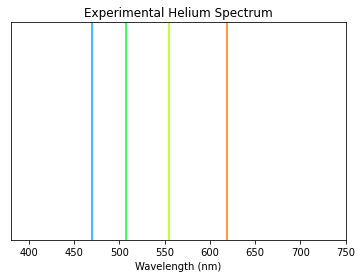

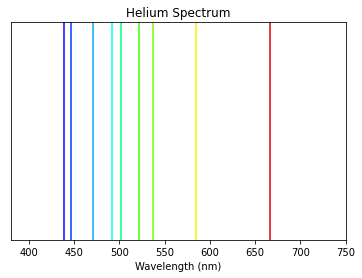

In [10]:
screenLoc = 0
gratingLoc = 63.7
center = np.array([15.4, 16.7,18.4, 20.75, 0.05])#Last one is to see how error would propagate
WL = []
for i in range(len(center)):
    angle = np.rad2deg(np.arctan(center[i] / (gratingLoc - screenLoc)))
    wavelength = np.sin(np.deg2rad(angle)) / spc *1e7

#     print('Line {}'.format(int(i+1)))
#     print('Angle between grating and line: {:.4f} degrees'.format(angle))
#     print('Wavelength: {:.4f} nm'.format(wavelength))
#     print('RGB: {}'.format(wavelength_to_rgb(wavelength)))
    WL.append(wavelength)
WL = np.array(WL)
colors = []
for i in WL:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=WL, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Experimental Helium Spectrum')
ax.set_yticks([]);
plt.savefig('Experimental Helium Spectrum.png',facecolor='w',format='png', bbox_inches='tight')
plt.show()

Helium = [439, 447, 471, 492, 502, 522, 537, 584.3, 667]
fig, ax = plt.subplots() 
colors = []
for i in Helium:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
ax.vlines(x=Helium, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Helium Spectrum')
ax.set_yticks([]);
plt.savefig('Helium Spectrum.png',facecolor='w',format='png', bbox_inches='tight')

In [11]:
WL

array([469.97712073, 507.19245639, 555.01743755, 619.45456244,
         1.56985823])

# Experiment 2

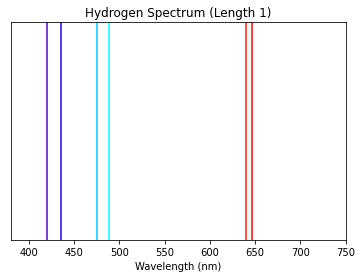

In [4]:
spc = 5000
screenLoc = 0
gratingLoc = 63.7
center = np.array([21.5,21.75,15.6,16.05,13.7,14.2])
WL1 = []
for i in range(len(center)):
    angle = np.rad2deg(np.arctan(center[i] / (gratingLoc - screenLoc)))
    wavelength = np.sin(np.deg2rad(angle)) / spc *1e7

#     print('Line {}'.format(int(i+1)))
#     print('Angle between grating and line: {:.4f} degrees'.format(angle))
#     print('Wavelength: {:.4f} nm'.format(wavelength))
#     print('RGB: {}'.format(wavelength_to_rgb(wavelength)))
    WL1.append(wavelength)
WL1 = np.array(WL1)
colors = []
for i in WL1:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=WL1, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Hydrogen Spectrum (Length 1)')
ax.set_yticks([]);

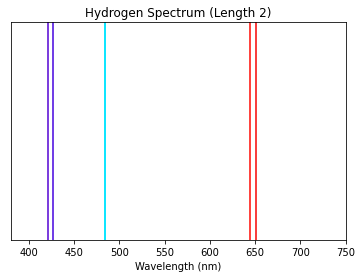

In [5]:
screenLoc = 0
gratingLoc = 35.7
center = np.array([12.15,12.3,8.9,8.9,7.8,7.7])
WL2 = []
for i in range(len(center)):
    angle = np.rad2deg(np.arctan(center[i] / (gratingLoc - screenLoc)))
    wavelength = np.sin(np.deg2rad(angle)) / spc *1e7

#     print('Line {}'.format(int(i+1)))
#     print('Angle between grating and line: {:.4f} degrees'.format(angle))
#     print('Wavelength: {:.4f} nm'.format(wavelength))
    #print('RGB: {}'.format(wavelength_to_rgb(wavelength)))
    WL2.append(wavelength)
WL2 = np.array(WL2)
colors = []
for i in WL2:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=WL2, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Hydrogen Spectrum (Length 2)')
ax.set_yticks([]);

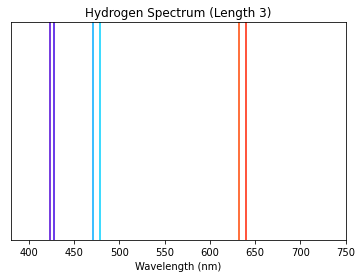

In [6]:
screenLoc = 0
gratingLoc = 21.9
center = np.array([7.4,7.3,5.4,5.3,4.75,4.8])
WL3 = []
for i in range(len(center)):
    angle = np.rad2deg(np.arctan(center[i] / (gratingLoc - screenLoc)))
    wavelength = np.sin(np.deg2rad(angle)) / spc *1e7

#     print('Line {}'.format(int(i+1)))
#     print('Angle between grating and line: {:.4f} degrees'.format(angle))
#     print('Wavelength: {:.4f} nm'.format(wavelength))
#     print('RGB: {}'.format(wavelength_to_rgb(wavelength)))
    WL3.append(wavelength)
WL3 = np.array(WL3)
colors = []
for i in WL3:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=WL3, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Hydrogen Spectrum (Length 3)')
ax.set_yticks([]);

In [21]:

specLines

array([642.40098019, 480.20360155, 426.06479098])

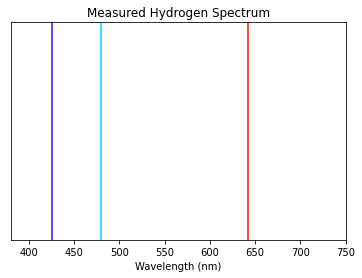

In [50]:
WL = np.array([WL1, WL2, WL3])
specLines = WL.T.mean(axis=1)
specLines = np.array([np.mean(specLines[:2]), np.mean(specLines[2:4]), np.mean(specLines[4:6])])
colors = []
for i in specLines:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=specLines, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Measured Hydrogen Spectrum')
ax.set_yticks([]);
#plt.savefig('Experiment 2 Measured Hydrogen Spectrum.png',facecolor='w',format='png',bbox_inches='tight')

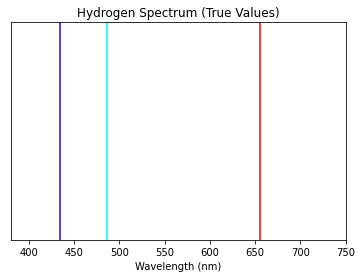

In [51]:
realValues = np.array([656,486,434])
colors = []
for i in realValues:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=realValues, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Hydrogen Spectrum (True Values)')
ax.set_yticks([]);
plt.savefig('Hydrogen Spectrum.png',facecolor='w',format='png',bbox_inches='tight')

In [52]:
specErr = WL.T.mean(axis=1)
specErr = np.array([np.std(specErr[:2])/np.sqrt(len(specErr[:2])), 
                    np.std(specErr[2:4])/np.sqrt(len(specErr[:4])), 
                    np.std(specErr[4:6])/np.sqrt(len(specErr[:6]))])
specDev = WL.T.mean(axis=1)
specDev = np.array([np.std(specDev[:2]), 
                    np.std(specDev[2:4]), 
                    np.std(specDev[4:6])])

In [14]:
specLines, specDev, specErr

(array([642.40098019, 480.20360155, 426.06479098]),
 array([0.99982919, 0.7571512 , 2.27731307]),
 array([0.706986  , 0.3785756 , 0.92970917]))

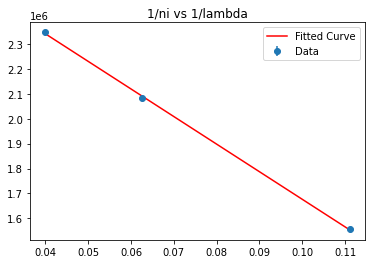

In [63]:
xData = 1/np.array([3,4,5])**2
yData = 1/(specLines*1e-9)
plt.errorbar(xData,yData ,yerr=1/(specErr), fmt='o', label='Data')
def f(x, a0, a1):
    return a0 + a1*x
par, cov = fitter.curve_fit(f,xData,yData)

x = np.linspace(min(xData),max(xData),100)
plt.plot(x,f(x,par[0],par[1]),color='red',label='Fitted Curve')
plt.legend()
plt.title('1/ni vs 1/lambda')
plt.savefig('stats shit.png',facecolor='w',format='png',bbox_inches='tight')

In [61]:
h = 4.135e-15
c = 3e8
-par[1],np.sqrt(cov[1][1])

(11067166.365697289, 225683.36968664784)

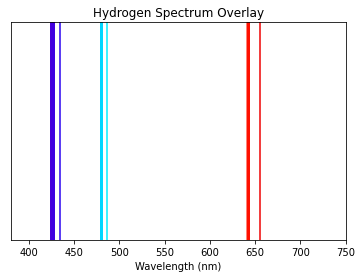

In [24]:
realValues = np.array([656,486,434])
colors = []
for i in realValues:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255

fig, ax = plt.subplots() 
ax.vlines(x=realValues, ymin = 0, ymax=1, colors=colors)

bandOne = np.linspace(specLines[0]-specErr[0],specLines[0]+specErr[0], 50)
bandTwo = np.linspace(specLines[1]-specErr[1],specLines[1]+specErr[1], 50)
bandThree = np.linspace(specLines[2]-specErr[2],specLines[2]+specErr[2], 50)

colorOne = []
for i in bandOne:
    colorOne.append(wavelength_to_rgb(i))
colorOne = np.array(colorOne) / 255

colorTwo = []
for i in bandTwo:
    colorTwo.append(wavelength_to_rgb(i))
colorTwo = np.array(colorTwo) / 255

colorThree = []
for i in bandThree:
    colorThree.append(wavelength_to_rgb(i))
colorThree = np.array(colorThree) / 255

ax.vlines(x=bandOne, ymin = 0, ymax=1, colors=colorOne, alpha=0.7)
ax.vlines(x=bandTwo, ymin = 0, ymax=1, colors=colorTwo, alpha=0.7)
ax.vlines(x=bandThree, ymin = 0, ymax=1, colors=colorThree, alpha=0.7)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Hydrogen Spectrum Overlay')
ax.set_yticks([]);
#fig.tight_layout()
plt.savefig('Experiment 2 Hydrogen Colored Overlay.png',facecolor='w',format='png',bbox_inches='tight')

# Experiment 3

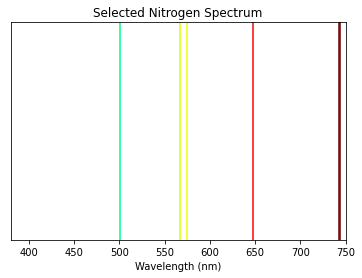

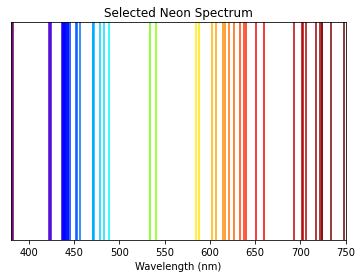

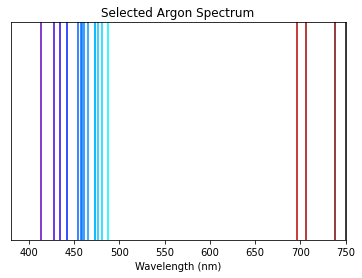

In [3]:
#Creating Spectra for Nitrogen, Neon, and Argon
Nitrogen = np.array([500.5, 567, 575.2, 648.2, 742.3, 744])
colors = []
for i in Nitrogen:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=Nitrogen, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Selected Nitrogen Spectrum')
ax.set_yticks([]);
#plt.savefig('Selected Nitrogen Spectrum.png',facecolor='w',format='png',bbox_inches='tight')

Neon = np.array([376.6259 , 377.7133 , 381.8427 , 382.9749 , 421.9745 , 423.385  ,
       425.0649 , 436.9862 , 437.94   , 437.955  , 438.5059 , 439.1991 ,
       439.799  , 440.9299 , 441.3215 , 442.1389 , 442.8516 , 442.8634 ,
       443.0904 , 443.0942 , 445.7049 , 452.272  , 453.77545, 456.9057 ,
       470.43949, 470.88594, 471.0065 , 471.20633, 471.5344 , 478.89258,
       482.7338 , 488.4917 , 534.10938, 540.05618, 585.24879, 588.18952,
       602.99969, 607.43377, 614.30626, 616.35939, 621.72812, 626.6495 ,
       633.44278, 638.29917, 640.2248 , 650.65281, 659.89529, 692.94673,
       702.40504, 703.24131, 705.91074, 717.39381, 721.32   , 723.5188 ,
       724.51666, 734.3945 , 748.88712])
colors = []
for i in Neon:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=Neon, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Selected Neon Spectrum')
ax.set_yticks([]);
#plt.savefig('Selected Neon Spectrum.png',facecolor='w',format='png',bbox_inches='tight')
#Argon
Argon = np.array([4131.724, 4277.528, 4348.064, 4426.001, 4545.052, 4579.35 ,
       4589.898, 4609.567, 4657.901, 4726.868, 4735.906, 4764.865,
       4806.02 , 4879.864, 6965.431, 7067.218, 7383.98 , 7503.869])*1e-1
colors = []
for i in Argon:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=Argon, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Selected Argon Spectrum')
ax.set_yticks([]);
#plt.savefig('Selected Argon Spectrum.png',facecolor='w',format='png',bbox_inches='tight')

Tube B

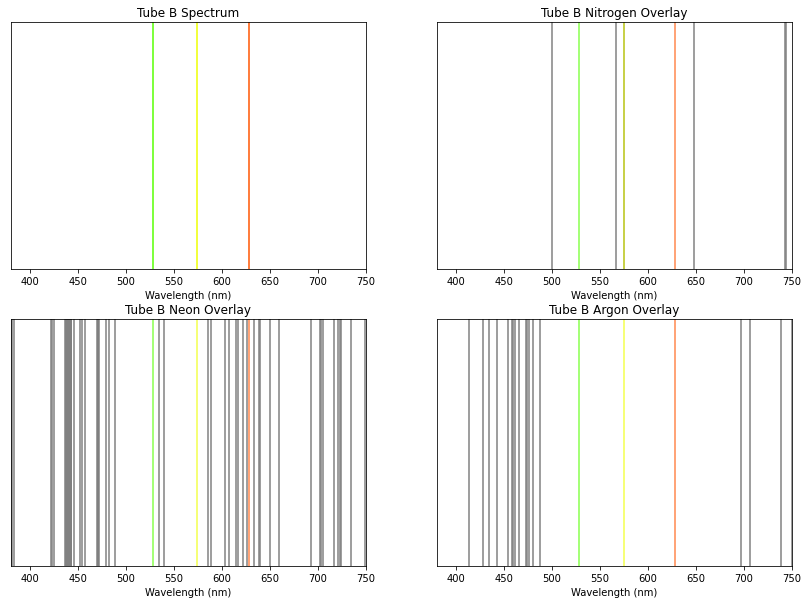

In [39]:
screenLoc = 0
spc = 5000
#Bad data, grating wasn't perpendicular
# gratingLoc = np.array([34.4, 45.0])
# center = np.array([[[9.45, 9.50], [10.2,10.4], [11.2,11.5]],
#                   [[12.50, 12.50],[13.60, 13.80],[14.95, 14.9]],
#                   [[0,0],[0,0],[0,0]]]) #green, yellow, red

gratingLoc = np.array([25.0, 40.0, 55.0])
center = np.array([[[6.75, 6.70], [7.45, 7.50], [8.1, 8.35]],
                  [[10.9,11.1],[11.85,12.1],[13.1, 13.4]],
                  [[15.05, 15.4],[16.45, 16.70],[18.1,18.55]]]) #green, yellow, red (cm)

WL = []
WLErr = []
for i in range(len(center)):
    temp = []
    temp2 = []
    for j in range(len(center[i])):
        o = center[i][j].mean() #opposite
        a = (gratingLoc[i] - screenLoc) #adjacent
        
        oErr = center[i][j].std() / np.sqrt(center[i][j].shape) #standard error
        aErr = 0.707 #sqrt(.5^2 + .5^2) ; measuring error
        
        angle = np.rad2deg(np.arctan(o / a))
        oErr =  0.5*(np.abs(angle-np.rad2deg(np.arctan((o+oErr) / a))) + 
                     np.abs(angle-np.rad2deg(np.arctan((o-oErr) / a))))[0]
        aErr = 0.5*(np.abs(angle-np.rad2deg(np.arctan(o / (a+aErr)))) + 
                     np.abs(angle-np.rad2deg(np.arctan(o / (a-aErr)))))
        
        angleErr = np.sqrt(oErr**2 + aErr**2)
        wavelength = np.sin(np.deg2rad(angle)) / spc *1e7
        wErr = (np.abs(wavelength-np.sin(np.deg2rad(angle+angleErr)) / spc *1e7) + 
               np.abs(wavelength-np.sin(np.deg2rad(angle-angleErr)) / spc *1e7))*0.5
        temp.append(wavelength)
        temp2.append(wErr)
        
    WL.append(temp)
    WLErr.append(temp2)
WL = np.array(WL)
WLErr = np.array(WLErr)

# for k in range(len(gratingLoc)):
#     colors = []
#     for i in WL[k]:
#         colors.append(wavelength_to_rgb(i))
#     colors = np.array(colors) / 255
#     fig, ax = plt.subplots() 
#     ax.vlines(x=WL[k], ymin = 0, ymax=1, colors=colors)
#     ax.set_xlim(380,750)
#     ax.set_ylim(0,1)
#     ax.set_xlabel('Wavelength (nm)')
#     ax.set_title('Tube B Spectrum (Length {})'.format(int(k+1)))
#     ax.set_yticks([]);

tubeB = np.array([WL[:,0].mean(), WL[:,1].mean(), WL[:,2].mean()])
colors = []
for i in tubeB:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, [ax1,ax2] = plt.subplots(2,2, figsize=(14,10)) 
ax1[0].vlines(x=tubeB, ymin = 0, ymax=1, colors=colors)
ax1[0].set_xlim(380,750)
ax1[0].set_ylim(0,1)
ax1[0].set_xlabel('Wavelength (nm)')
ax1[0].set_title('Tube B Spectrum')
ax1[0].set_yticks([]);

ax1[1].vlines(x=Nitrogen, ymin = 0, ymax=1, colors='gray')
ax1[1].vlines(x=tubeB, ymin = 0, ymax=1, colors=colors, alpha=0.7)
ax1[1].set_xlim(380,750)
ax1[1].set_ylim(0,1)
ax1[1].set_xlabel('Wavelength (nm)')
ax1[1].set_title('Tube B Nitrogen Overlay');
ax1[1].set_yticks([]);

ax2[0].vlines(x=Neon, ymin = 0, ymax=1, colors='gray')
ax2[0].vlines(x=tubeB, ymin = 0, ymax=1, colors=colors, alpha=0.7)
ax2[0].set_xlim(380,750)
ax2[0].set_ylim(0,1)
ax2[0].set_xlabel('Wavelength (nm)')
ax2[0].set_title('Tube B Neon Overlay');
ax2[0].set_yticks([]);

ax2[1].vlines(x=Argon, ymin = 0, ymax=1, colors='gray')
ax2[1].vlines(x=tubeB, ymin = 0, ymax=1, colors=colors, alpha=0.7)
ax2[1].set_xlim(380,750)
ax2[1].set_ylim(0,1)
ax2[1].set_xlabel('Wavelength (nm)')
ax2[1].set_title('Tube B Argon Overlay');
ax2[1].set_yticks([]);

#plt.savefig('Lab 5 Experiment 3 Tube B Overlay.png',facecolor='w',format='png',bbox_inches='tight')

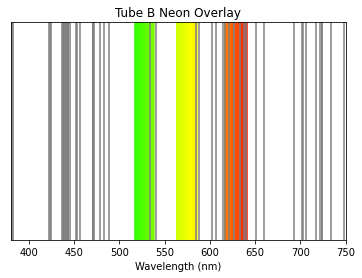

In [53]:
tubeB = np.array([WL[:,0].mean(), WL[:,1].mean(), WL[:,2].mean()])
bErr = np.array([WLErr[:,0].mean(), WLErr[:,1].mean(), WLErr[:,2].mean()])

bandOne = np.linspace(tubeB[0]-bErr[0],tubeB[0]+bErr[0],50)
bandTwo = np.linspace(tubeB[1]-bErr[1],tubeB[1]+bErr[1],50)
bandThree = np.linspace(tubeB[2]-bErr[2],tubeB[2]+bErr[2],50)


fig,ax = plt.subplots()

colorOne = []
for i in bandOne:
    colorOne.append(wavelength_to_rgb(i))
colorOne = np.array(colorOne) / 255

colorTwo = []
for i in bandTwo:
    colorTwo.append(wavelength_to_rgb(i))
colorTwo = np.array(colorTwo) / 255

colorThree = []
for i in bandThree:
    colorThree.append(wavelength_to_rgb(i))
colorThree = np.array(colorThree) / 255
Alpha = 1
ax.vlines(x=bandOne, ymin = 0, ymax=1, colors=colorOne, alpha=Alpha)
ax.vlines(x=bandTwo, ymin = 0, ymax=1, colors=colorTwo, alpha=Alpha)
ax.vlines(x=bandThree, ymin = 0, ymax=1, colors=colorThree, alpha=Alpha)
ax.vlines(x=Neon, ymin = 0, ymax=1, colors='gray')

ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Tube B Neon Overlay')
ax.set_yticks([]);
plt.savefig('Tube B Err Neon.png',facecolor='w',format='png',bbox_inches='tight')

In [48]:
tubeB,bErr

(array([527.80490219, 574.54187113, 628.71094162]),
 array([10.19397319, 10.79437902, 12.29908572]))

Tube C

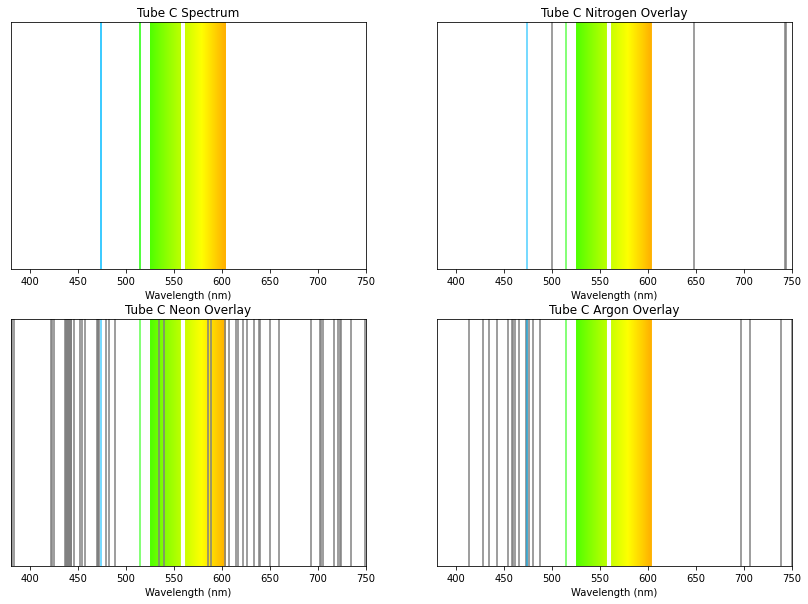

In [58]:
screenLoc = 0
spc = 5000
gratingLoc = np.array([25.0, 40.0, 55.0])
center = np.array([[[6.05,6.15], [6.6,6.65], [6.75,6.9], [7.2,7.35], [7.25,7.3],[7.85,7.9]],
                  [[9.7,9.7],[10.6,10.65],[10.8,10.85], [11.45,11.5],[11.75,11.7],[12.6,12.7]],
                  [[13.5,13.45],[14.7,14.75],[15.05,15.1],[15.9,16.1],[16.15,16.3],[17.3,17.7]]]) 
                    #first two are centers, next 2 is 1 band, last 2 is 1 band

WL = []
WLErr = []
for i in range(len(center)):
    temp = []
    temp2 = []
    for j in range(len(center[i])):
        o = center[i][j].mean() #opposite
        a = (gratingLoc[i] - screenLoc) #adjacent
        
        oErr = center[i][j].std() / np.sqrt(center[i][j].shape) #standard error
        aErr = 0.707 #sqrt(.5^2 + .5^2) ; measuring error
        
        angle = np.rad2deg(np.arctan(o / a))
        oErr =  0.5*(np.abs(angle-np.rad2deg(np.arctan((o+oErr) / a))) + 
                     np.abs(angle-np.rad2deg(np.arctan((o-oErr) / a))))[0]
        aErr = 0.5*(np.abs(angle-np.rad2deg(np.arctan(o / (a+aErr)))) + 
                     np.abs(angle-np.rad2deg(np.arctan(o / (a-aErr)))))
        
        angleErr = np.sqrt(oErr**2 + aErr**2)
        wavelength = np.sin(np.deg2rad(angle)) / spc *1e7
        wErr = (np.abs(wavelength-np.sin(np.deg2rad(angle+angleErr)) / spc *1e7) + 
               np.abs(wavelength-np.sin(np.deg2rad(angle-angleErr)) / spc *1e7))*0.5
        temp.append(wavelength)
        temp2.append(wErr)
        
    WL.append(temp)
    WLErr.append(temp2)
WL = np.array(WL)
WLErr = np.array(WLErr)

tubeC = np.array([WL[:,0].mean(), WL[:,1].mean(), WL[:,2].mean(), 
                  WL[:,3].mean(), WL[:,4].mean(), WL[:,5].mean()])
cErr = np.array([WLErr[:,0].mean(), WLErr[:,1].mean(), WLErr[:,2].mean(),
                 WLErr[:,3].mean(), WLErr[:,4].mean(), WLErr[:,5].mean()])

N = 200
bandOne = np.linspace(tubeC[2],tubeC[3], N)
bandTwo = np.linspace(tubeC[4],tubeC[5], N)

colors = []
for i in tubeC[:2]:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255

colorBandOne = []
for i in bandOne:
    colorBandOne.append(wavelength_to_rgb(i))
colorBandOne = np.array(colorBandOne) / 255
    
colorBandTwo = []
for i in bandTwo:
    colorBandTwo.append(wavelength_to_rgb(i))
colorBandTwo = np.array(colorBandTwo) / 255


fig, [ax1,ax2] = plt.subplots(2,2, figsize=(14,10)) 
ax1[0].vlines(x=tubeC[:2], ymin = 0, ymax=1, colors=colors)
ax1[0].vlines(x=bandOne, ymin = 0, ymax=1, colors=colorBandOne)
ax1[0].vlines(x=bandTwo, ymin = 0, ymax=1, colors=colorBandTwo)
ax1[0].set_xlim(380,750)
ax1[0].set_ylim(0,1)
ax1[0].set_xlabel('Wavelength (nm)')
ax1[0].set_title('Tube C Spectrum')
ax1[0].set_yticks([]);

ax1[1].vlines(x=Nitrogen, ymin = 0, ymax=1, colors='gray')
ax1[1].vlines(x=tubeC[:2], ymin = 0, ymax=1, colors=colors, alpha=0.7)
ax1[1].vlines(x=bandOne, ymin = 0, ymax=1, colors=colorBandOne, alpha=0.7)
ax1[1].vlines(x=bandTwo, ymin = 0, ymax=1, colors=colorBandTwo, alpha=0.7)
ax1[1].set_xlim(380,750)
ax1[1].set_ylim(0,1)
ax1[1].set_xlabel('Wavelength (nm)')
ax1[1].set_title('Tube C Nitrogen Overlay');
ax1[1].set_yticks([]);


ax2[0].vlines(x=tubeC[:2], ymin = 0, ymax=1, colors=colors, alpha=0.7)
ax2[0].vlines(x=bandOne, ymin = 0, ymax=1, colors=colorBandOne, alpha=0.7)
ax2[0].vlines(x=bandTwo, ymin = 0, ymax=1, colors=colorBandTwo, alpha=0.7)
ax2[0].vlines(x=Neon, ymin = 0, ymax=1, colors='gray')
ax2[0].set_xlim(380,750)
ax2[0].set_ylim(0,1)
ax2[0].set_xlabel('Wavelength (nm)')
ax2[0].set_title('Tube C Neon Overlay');
ax2[0].set_yticks([]);

ax2[1].vlines(x=Argon, ymin = 0, ymax=1, colors='gray')
ax2[1].vlines(x=tubeC[:2], ymin = 0, ymax=1, colors=colors, alpha=0.7)
ax2[1].vlines(x=bandOne, ymin = 0, ymax=1, colors=colorBandOne, alpha=0.7)
ax2[1].vlines(x=bandTwo, ymin = 0, ymax=1, colors=colorBandTwo, alpha=0.7)
ax2[1].set_xlim(380,750)
ax2[1].set_ylim(0,1)
ax2[1].set_xlabel('Wavelength (nm)')
ax2[1].set_title('Tube C Argon Overlay');
ax2[1].set_yticks([]);

#plt.savefig('Lab 5 Experiment 3 Tube C Overlay.png',facecolor='w',format='png',bbox_inches='tight')

In [62]:
cErr
tubeC

array([473.78495334, 514.33325338, 525.95444888, 556.32802358,
       562.42976356, 603.45389809])

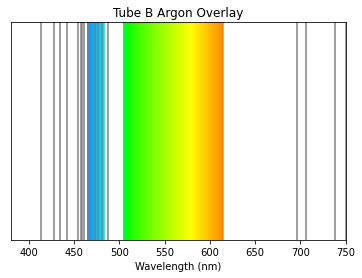

In [65]:
bandOne = np.linspace(tubeC[0]-cErr[0],tubeC[0]+cErr[0],100)
bandTwo = np.linspace(tubeC[1]-cErr[1],tubeC[1]+cErr[1],100)
bandThree = np.linspace(tubeC[2]-cErr[2],tubeC[3]+cErr[3],100)
bandFour = np.linspace(tubeC[4]-cErr[4],tubeC[5]+cErr[5],100)

fig,ax = plt.subplots()

colorOne = []
for i in bandOne:
    colorOne.append(wavelength_to_rgb(i))
colorOne = np.array(colorOne) / 255

colorTwo = []
for i in bandTwo:
    colorTwo.append(wavelength_to_rgb(i))
colorTwo = np.array(colorTwo) / 255

colorThree = []
for i in bandThree:
    colorThree.append(wavelength_to_rgb(i))
colorThree = np.array(colorThree) / 255

colorFour = []
for i in bandFour:
    colorFour.append(wavelength_to_rgb(i))
colorFour = np.array(colorFour) / 255



Alpha = 1
ax.vlines(x=bandOne, ymin = 0, ymax=1, colors=colorOne, alpha=Alpha)
ax.vlines(x=bandTwo, ymin = 0, ymax=1, colors=colorTwo, alpha=Alpha)
ax.vlines(x=bandThree, ymin = 0, ymax=1, colors=colorThree, alpha=Alpha)
ax.vlines(x=bandFour, ymin = 0, ymax=1, colors=colorFour, alpha=Alpha)


ax.vlines(x=Argon, ymin = 0, ymax=1, colors='gray')

ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Tube B Argon Overlay')
ax.set_yticks([]);
plt.savefig('Tube C Err Argon.png',facecolor='w',format='png',bbox_inches='tight')

# Experiment 4

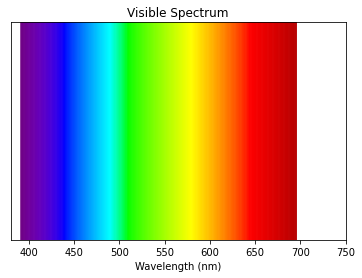

In [41]:
screenLoc = 13
spc = 5000

gratingLoc = np.array([38,53,68])
center = np.array([[[4.95,4.9], [9.65,9.5]],
                  [[8.2,7.9],[15.0,12.5]],
                  [[11.1,11.0],[21.5,21.0]]]) #(cm)

WL = []
for i in range(len(center)):
    temp = []
    for j in range(len(center[i])):
        angle = np.rad2deg(np.arctan(center[i][j].mean() / (gratingLoc[i] - screenLoc)))
        wavelength = np.sin(np.deg2rad(angle)) / spc *1e7
        temp.append(wavelength)
    WL.append(temp)
WL = np.array(WL)


lightBulb = np.array([WL[:,0].mean(), WL[:,1].mean()])
lightBulb
band = np.linspace(lightBulb[0],lightBulb[1],500)
colors = []
for i in band:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=band, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Visible Spectrum'.format(int(k+1)))
ax.set_yticks([]);

In [ ]:
screenLoc = 13.5
spc = 5000

gratingLoc = np.array([38.5,53.5,68.5])
center = np.array([[[5.4,5.5], [5.6,5.65], [], [], 
                    [], [], [], []],
                  [ [], [], [], [], 
                   [], [], [], []],
                  [ [], [], [], [], 
                   [], [], [], []]]) #(cm)

WL = []
for i in range(len(center)):
    temp = []
    for j in range(len(center[i])):
        angle = np.rad2deg(np.arctan(center[i][j].mean() / (gratingLoc[i] - screenLoc)))
        wavelength = np.sin(np.deg2rad(angle)) / spc *1e7
        temp.append(wavelength)
    WL.append(temp)
WL = np.array(WL)


lightBulb = np.array([WL[:,0].mean(), WL[:,1].mean()])
lightBulb
band = np.linspace(lightBulb[0],lightBulb[1],500)
colors = []
for i in band:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=band, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Lightbulb Spectrum'.format(int(k+1)))
ax.set_yticks([]);